In [1]:
import pandas as pd
import numpy as np
import math
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import warnings
warnings.filterwarnings("ignore")

* Base de pokemons

In [2]:
pokemon = pd.read_csv('pokemon.csv')

In [3]:
pd.set_option('display.max_columns', None)
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


# Clusterização Hierárquica

* Selecionando algumas variáveis

In [4]:
df = pokemon[['attack','speed']]

In [5]:
df.head()

,attack,speed
0,49,45
1,62,60
2,100,80
3,52,65
4,64,80


* Plotando as observações conforme as variáveis selecionadas

<AxesSubplot:xlabel='attack', ylabel='speed'>

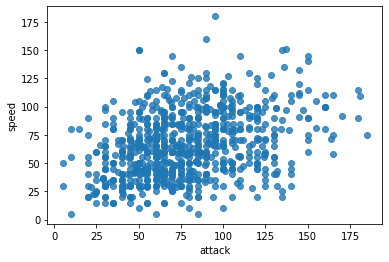

In [6]:
sns.regplot(x=df["attack"], y=df["speed"], fit_reg=False)

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy import stats

* Normalizando os dados

In [8]:
df['attack_padronizado'] = stats.zscore(df['attack'])
df['speed_padronizado'] = stats.zscore(df['speed'])

In [9]:
df.head()

,attack,speed,attack_padronizado,speed_padronizado
0,49,45,-0.897909,-0.738486
1,62,60,-0.493413,-0.219268
2,100,80,0.688960,0.473022
3,52,65,-0.804564,-0.046196
4,64,80,-0.431183,0.473022


In [10]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score

* O score silhouette mensura quão bem uma observação esta classificada no seu cluster
    * Compara-se a distância dela com as outras observações do mesmo cluster com a distância para as observações do cluster mais próximo
    * Nesta aplicação, retorna-se a média deste score entre todas as observações
    * Testa-se como esse score varia conforme diferentes números de clusters (2 até 9 clusters)
    * Aplica-se o método da média das distâncias (Average linkage), em que a similaridade entre dois clusters é definida pela média das distâncias de todos os pontos de um cluster em relação a todos os pontos do outro

In [11]:
silhouette_scores = [] 
for n_cluster in range(2, 10):
    silhouette_scores.append( 
        silhouette_score(df[['attack_padronizado','speed_padronizado']],
                         AgglomerativeClustering(n_clusters = n_cluster, linkage = 'average').fit_predict(df[['attack_padronizado','speed_padronizado']])))
silhouette_scores
#Observa-se que o melhor índice é com 02 clusters

[0.419669815282341,
 0.3391637658271035,
 0.199856570681384,
 0.20327026343083154,
 0.19667989679569625,
 0.2623454707181343,
 0.2535370918387783,
 0.27741058235718224]

* Plotando as observações classificadas em 02 clusters

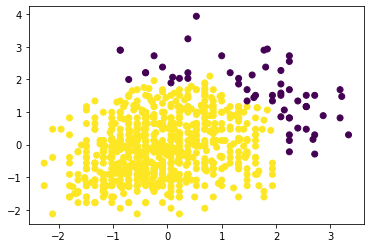

In [12]:
plt.scatter(df['attack_padronizado'], df['speed_padronizado'],  
           c = AgglomerativeClustering(n_clusters = 2, linkage = 'average').fit_predict(df[['attack_padronizado','speed_padronizado']])) 
plt.show()

* Mesmo teste anterior, só que empregando o metodo completo para calculo das distâncias (Complete linkage)
    * Neste, a medida de similaridade entre dois clusters é definida pela menor distância de qualquer ponto do 1º cluster para qualquer ponto do 2º cluster

In [13]:
silhouette_scores = [] 
for n_cluster in range(2, 10):
    silhouette_scores.append( 
        silhouette_score(df[['attack_padronizado','speed_padronizado']],
                         AgglomerativeClustering(n_clusters = n_cluster, linkage = 'complete').fit_predict(df[['attack_padronizado','speed_padronizado']])))
silhouette_scores
#Novamente, 02 clusters possui o melhor silhouette score, só que com diferença menor entre outras opções

[0.28248003618018225,
 0.2716177320408386,
 0.25238301152977316,
 0.24615250484274423,
 0.2190208545894446,
 0.2051745128659457,
 0.2692104612265973,
 0.2706612525784858]

* Plotando as observações pelos clusters

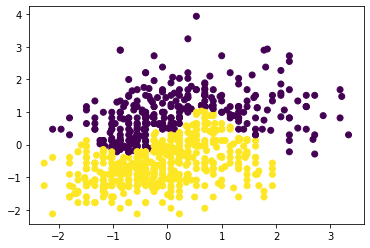

In [14]:
plt.scatter(df['attack_padronizado'], df['speed_padronizado'],  
           c = AgglomerativeClustering(n_clusters = 2, linkage = 'complete').fit_predict(df[['attack_padronizado','speed_padronizado']])) 
plt.show()

* Aplicando o método ward como medida de similaridade entre clusters
    * Neste a distância entre dois clusters é a soma das distâncias ao quadrado entre os grupos
    * Aplicando este método, busca-se minimizar a variância interna de cada cluster formado

In [15]:
silhouette_scores = [] 
for n_cluster in range(2, 10):
    silhouette_scores.append( 
        silhouette_score(df[['attack_padronizado','speed_padronizado']],
                         AgglomerativeClustering(n_clusters = n_cluster, linkage = 'ward').fit_predict(df[['attack_padronizado','speed_padronizado']])))
silhouette_scores
#Pelo metodo Ward, o melhor score é com 04 Cluster

[0.32320021867748405,
 0.27620398966328485,
 0.3266554590142857,
 0.32488579493404324,
 0.2893796443008761,
 0.29204876423993703,
 0.30326483541328353,
 0.2939132998487823]

* Plotando o cluster formado 

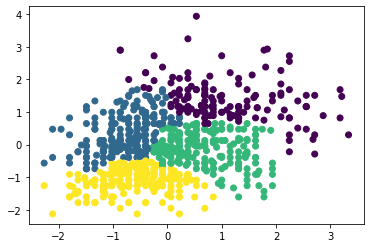

In [16]:
plt.scatter(df['attack_padronizado'], df['speed_padronizado'],  
           c = AgglomerativeClustering(n_clusters = 4, linkage = 'ward').fit_predict(df[['attack_padronizado','speed_padronizado']])) 
plt.show() 

* Calculando o score para diferentes métodos e número de clusters

In [17]:
silhouette_scores = pd.DataFrame(columns=['Metodo','N_clusters','Score'])
for metodo in ['ward','complete','average','single']:
    for n_cluster in range(2, 10):
        silhouette_scores =  silhouette_scores.append({'Metodo': metodo, 'N_clusters': n_cluster,
                                  'Score':silhouette_score(df[['attack_padronizado','speed_padronizado']],AgglomerativeClustering(n_clusters = n_cluster, linkage = metodo).fit_predict(df[['attack_padronizado','speed_padronizado']]))},ignore_index=True)
silhouette_scores
silhouette_scores = silhouette_scores.sort_values(by = 'Score', ascending = False)
silhouette_scores

,Metodo,N_clusters,Score
24,single,2,0.493476
25,single,3,0.438029
16,average,2,0.419670
26,single,4,0.395000
17,average,3,0.339164
2,ward,4,0.326655
3,ward,5,0.324886
0,ward,2,0.323200
6,ward,8,0.303265
7,ward,9,0.293913


* Verificando a proporção de observações nos cluster

In [18]:
cluster = AgglomerativeClustering(n_clusters = 2, linkage = 'single')
df['cluster'] = cluster.fit_predict(df[['attack_padronizado','speed_padronizado']])
(pd.value_counts(df['cluster'])/len(df))

1    0.997503
0    0.002497
Name: cluster, dtype: float64

In [19]:
#Uma opção desejada pode ser escolher uma configuração de clusters que tenha proporção mais equilibrada de observações
cluster = AgglomerativeClustering(n_clusters = 4, linkage = 'ward')
df['cluster'] = cluster.fit_predict(df[['attack_padronizado','speed_padronizado']])
(pd.value_counts(df['cluster'])/len(df))

1    0.277154
3    0.272160
2    0.264669
0    0.186017
Name: cluster, dtype: float64

* Verificando os clusters com as variáveis originais

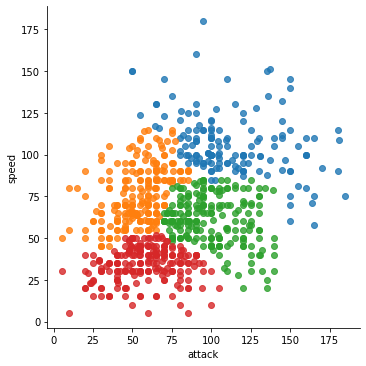

In [20]:
sns.lmplot( x="attack", y="speed", data=df, fit_reg=False, hue='cluster', legend=False)

* Inserindo mais variáveis para clusterizar

In [21]:
df = pokemon[['attack','speed','defense','weight_kg']]

In [22]:
df.isna().sum()

attack        0
speed         0
defense       0
weight_kg    20
dtype: int64

In [23]:
df.dropna(axis=0,inplace=True)

In [24]:
# Normalizando as variáveis
df['attack_padronizado'] = stats.zscore(df['attack'])
df['speed_padronizado'] = stats.zscore(df['speed'])
df['defense_padronizado'] = stats.zscore(df['defense'])
df['peso_padronizado'] = stats.zscore(df['weight_kg'])
df_c = df[['attack_padronizado','speed_padronizado','defense_padronizado','peso_padronizado']]

In [25]:
# Verificando o silhouette score conforme varia-se o método de cálculo da medida de similaridade entre os clusters e o número de agrupamentos
silhouette_scores = pd.DataFrame(columns=['Metodo','N_clusters','Score'])
for metodo in ['ward','complete','average','single']:
    for n_cluster in range(2, 10):
        silhouette_scores =  silhouette_scores.append({'Metodo': metodo, 'N_clusters': n_cluster,
                                  'Score':silhouette_score(df_c,AgglomerativeClustering(n_clusters = n_cluster, linkage = metodo).fit_predict(df_c))},ignore_index=True)
silhouette_scores
silhouette_scores = silhouette_scores.sort_values(by = 'Score', ascending = False)
silhouette_scores.head(20)

,Metodo,N_clusters,Score
24,single,2,0.725282
8,complete,2,0.701923
16,average,2,0.692362
17,average,3,0.613569
27,single,5,0.597388
26,single,4,0.590837
25,single,3,0.589215
18,average,4,0.585254
28,single,6,0.578482
29,single,7,0.576955


In [26]:
silhouette_scores['N_clusters'] = silhouette_scores['N_clusters'].astype(int)

* Verificando a proporção de observações em cada cluster variando o metodo e o numero de clusters 

In [27]:
for x,y,z in zip(silhouette_scores.Metodo,silhouette_scores.N_clusters,silhouette_scores.Score):
    cluster = AgglomerativeClustering(n_clusters = y, linkage = x)
    df['cluster'] = cluster.fit_predict(df_c)
    print(x,y,'Score',z)
    print((pd.value_counts(df['cluster'])/len(df)))

single 2 Score 0.7252817902633275
0    0.99872
1    0.00128
Name: cluster, dtype: float64
complete 2 Score 0.7019226633543582
0    0.991037
1    0.008963
Name: cluster, dtype: float64
average 2 Score 0.6923617489498815
0    0.989757
1    0.010243
Name: cluster, dtype: float64
average 3 Score 0.6135688218995357
2    0.984635
1    0.010243
0    0.005122
Name: cluster, dtype: float64
single 5 Score 0.5973875158424674
0    0.992318
1    0.003841
2    0.001280
3    0.001280
4    0.001280
Name: cluster, dtype: float64
single 4 Score 0.5908372244720301
0    0.996159
1    0.001280
2    0.001280
3    0.001280
Name: cluster, dtype: float64
single 3 Score 0.5892147301169736
0    0.997439
1    0.001280
2    0.001280
Name: cluster, dtype: float64
average 4 Score 0.5852536625775625
0    0.984635
1    0.010243
2    0.003841
3    0.001280
Name: cluster, dtype: float64
single 6 Score 0.5784818503916803
0    0.988476
1    0.003841
2    0.003841
3    0.001280
4    0.001280
5    0.001280
Name: cluster, dt

* Inserindo o cluster de cada observação 

In [29]:
cluster = AgglomerativeClustering(n_clusters = 2, linkage = 'single')
df['cluster'] = cluster.fit_predict(df_c)
df = df[['attack','speed','defense','weight_kg','cluster']]
df['cluster'] = df['cluster'].astype(str)

In [30]:
df.head()

,attack,speed,defense,weight_kg,cluster
0,49,45,49,6.9,0
1,62,60,63,13.0,0
2,100,80,123,100.0,0
3,52,65,43,8.5,0
4,64,80,58,19.0,0


* Dado os clusters formados, verifica-se como cada um esta caracterizado conforme as variáveis utilizadas

In [31]:
df.groupby("cluster").mean().reset_index()

,cluster,attack,speed,defense,weight_kg
0,0,77.562821,66.248718,72.891026,60.238846
1,1,180.000000,90.000000,160.000000,950.000000


* Mesma analise anterior, só que com outra configuração de cluster

In [38]:
df = pokemon[['attack','speed','defense','weight_kg']]
df.dropna(axis=0,inplace=True)
cluster = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')
df['cluster'] = cluster.fit_predict(df_c)
df = df[['attack','speed','defense','weight_kg','cluster']]
df['cluster'] = df['cluster'].astype(str)

In [39]:
df.groupby("cluster").mean().reset_index()

,cluster,attack,speed,defense,weight_kg
0,0,101.015528,81.099379,91.515528,85.477019
1,1,110.857143,63.714286,109.571429,884.400000
2,2,81.400000,40.300000,190.700000,242.600000
3,3,60.095023,56.110860,56.273756,26.687557


# Clusterização Não-Hierárquica

In [46]:
from sklearn.cluster import KMeans

* Separando algumas variáveis da base

In [42]:
df = pokemon[['sp_attack','sp_defense']]

* Padronizando a escala das variáveis 

In [43]:
df['sp_attack_padronizado'] = stats.zscore(df['sp_attack'])
df['sp_defense_padronizado'] = stats.zscore(df['sp_defense'])
df_c = df[['sp_attack_padronizado','sp_defense_padronizado']]

In [44]:
df_c.dtypes

sp_attack_padronizado     float64
sp_defense_padronizado    float64
dtype: object

* Configuração do algoritmo Kmeans
    * init = 'random'; escolha aleatória dos centróides iniciais
    * n_init - Número de vezes que o algoritmo será executado com distintos centróides
    * max_iter - Número máximo de iterações do algoritmo em uma execução
    * n_clusters - número de clusters a serem formados, assim como o número de centróides

In [47]:
kmeans = KMeans(init = 'random',n_init = 30,max_iter = 400,n_clusters=3, random_state=50).fit(df_c)

In [48]:
df['clusters'] = kmeans.labels_

* Plotando os clusters definidos

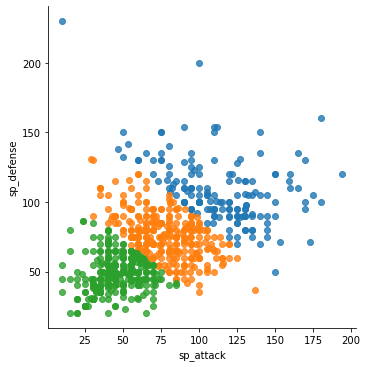

In [49]:
sns.lmplot( x="sp_attack", y="sp_defense", data=df, fit_reg=False, hue='clusters', legend=False)

* Calculo da soma do quadrado das distâncias de cada observaçao em relação ao centróide do cluster, variando conforme a quantidade de grupos estabelecidos

In [54]:
sse = []
for x in range(2, 16):
    kmeans = KMeans(init = 'random',n_init = 30,max_iter = 400,n_clusters=x,random_state=50)
    kmeans.fit(df_c)
    sse.append(kmeans.inertia_)

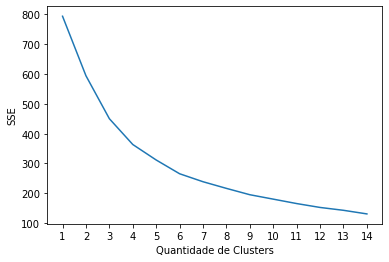

In [55]:
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Quantidade de Clusters")
plt.ylabel("SSE")
plt.show()
#Aparentemente, o erro se estabiliza conforme vamos de 7 clusters em diante

* Plotando os clusters formados

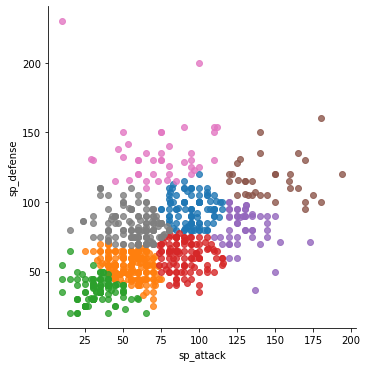

In [57]:
kmeans = KMeans(init = 'random',n_init = 30,max_iter = 400,n_clusters=8, random_state=50).fit(df_c)
df['clusters'] = kmeans.labels_
sns.lmplot( x="sp_attack", y="sp_defense", data=df, fit_reg=False, hue='clusters', legend=False)

In [58]:
#Calcula-se os silhoutte scores para diferentes número de clusters
silhouette_scores = []
for x in range(2, 15):
    kmeans = KMeans(init = 'random',n_init = 30,max_iter = 400,n_clusters=x,random_state=50)
    kmeans.fit(df_c)
    score = silhouette_score(df_c, kmeans.labels_)
    silhouette_scores.append(score)

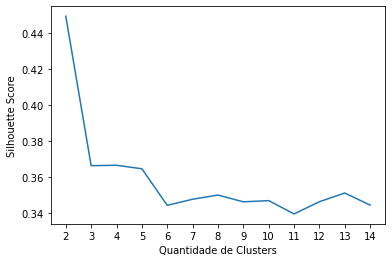

In [59]:
plt.plot(range(2, 15), silhouette_scores)
plt.xticks(range(2, 15))
plt.xlabel("Quantidade de Clusters")
plt.ylabel("Silhouette Score")
plt.show()

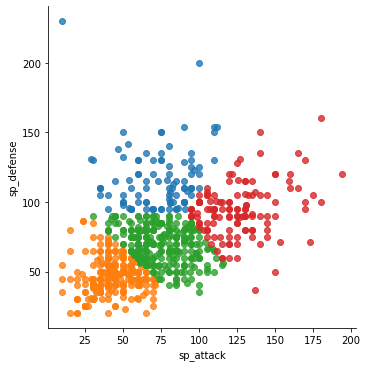

In [60]:
kmeans = KMeans(init = 'random',n_init = 30,max_iter = 400,n_clusters=4, random_state=50).fit(df_c)
df['clusters'] = kmeans.labels_
sns.lmplot( x="sp_attack", y="sp_defense", data=df, fit_reg=False, hue='clusters', legend=False)